### Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import os
# from sklearn.metrics import 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

&nbsp;

### Loading Dataset

In [56]:
filepath = os.getcwd() + "/tennis.csv"
df = pd.read_csv(filepath)
df['play_hrs'] = [20,45,95,17,40,59,19,60,10,57,28,59,29,15]
df.drop(['play'],axis=1,inplace=True)
df.head()

,outlook,temp,humidity,windy,play_hrs
0,sunny,hot,high,False,20
1,sunny,hot,high,True,45
2,overcast,hot,high,False,95
3,rainy,mild,high,False,17
4,rainy,cool,normal,False,40


&nbsp;

### Descriptive Analysis

In [57]:
print(df.info(),"\n")
print("Missing values in given data :")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null bool
play_hrs    14 non-null int64
dtypes: bool(1), int64(1), object(3)
memory usage: 590.0+ bytes
None 

Missing values in given data :
outlook     0
temp        0
humidity    0
windy       0
play_hrs    0
dtype: int64


&nbsp;

&nbsp;

### EDA

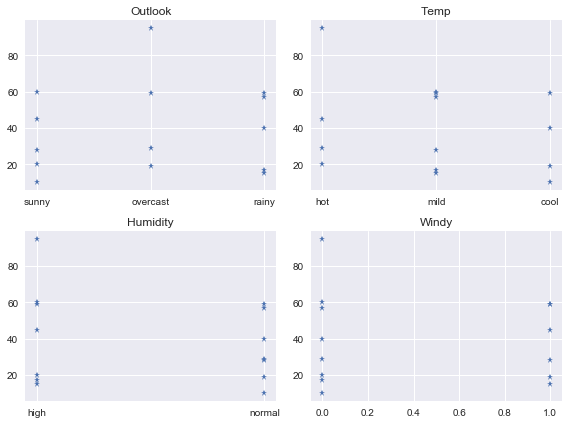

In [73]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,6))
axes[0][0].plot(df['outlook'],df['play_hrs'],'*')
axes[0,0].title.set_text("Outlook")
axes[0][1].plot(df['temp'],df['play_hrs'],'*')
axes[0,1].title.set_text("Temp")
axes[1][0].plot(df['humidity'],df['play_hrs'],'*')
axes[1,0].title.set_text("Humidity")
axes[1][1].plot(df['windy'],df['play_hrs'],'*')
axes[1,1].title.set_text("Windy")

plt.style.use('seaborn')

plt.tight_layout()

plt.show()

&nbsp;

### Dummy Variables Creation<span style='background:yellow'>(Instead of direct categorical variable, sklearn library works with encoded category variables to find Entropy and I.G for best splits)</span>

In [10]:
df_dummy = pd.get_dummies(data = df, columns=['outlook','temp','humidity','windy'])
df_dummy.head()

,play_hrs,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,20,0,0,1,0,1,0,1,0,1,0
1,45,0,0,1,0,1,0,1,0,0,1
2,95,1,0,0,0,1,0,1,0,1,0
3,17,0,1,0,0,0,1,1,0,1,0
4,40,0,1,0,1,0,0,0,1,1,0


&nbsp;

### Train & Test split

In [15]:
X = df_dummy.drop('play_hrs',axis=1)
y = df_dummy['play_hrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

&nbsp;

### Hyperparameters Optimization

In [22]:
#create a dictionary of all values we want to test
param_grid = { 'criterion' : ['mse'],
               'max_depth' : np.arange(3,5),
               'max_features' : np.arange(3,5)
             }

#Decision Tree Model
dtree_model = DecisionTreeRegressor()

#Use gridsearch to test all possible parameters for best accuracy
dtree_gscv = GridSearchCV(dtree_model, param_grid = param_grid, cv = 5)

#Fit model to data
dtree_gscv.fit(X_train,y_train)


#GridSearch Results
print('Best parameters as per kfolds mean accuray : {}\n'.format(dtree_gscv.best_params_))
print('Mean accuray as per best parameters : {}\n'.format(dtree_gscv.best_score_))
print('GridSearch all parameters :')
print(dtree_gscv.cv_results_['params'],'\n')
print('GridSearch all parameters kfolds mean accuracy:')
print(dtree_gscv.cv_results_['mean_test_score'])
# dtree_gscv.cv_results_

Best parameters as per kfolds mean accuray : {'criterion': 'mse', 'max_depth': 3, 'max_features': 3}

Mean accuray as per best parameters : nan

GridSearch all parameters :
[{'criterion': 'mse', 'max_depth': 3, 'max_features': 3}, {'criterion': 'mse', 'max_depth': 3, 'max_features': 4}, {'criterion': 'mse', 'max_depth': 4, 'max_features': 3}, {'criterion': 'mse', 'max_depth': 4, 'max_features': 4}] 

GridSearch all parameters kfolds mean accuracy:
[nan nan nan nan]


&nbsp;

### Best Model parameters as per Gridsearch_cv

In [24]:
#Decision Tree Model 
dtree = DecisionTreeRegressor(criterion='mse', max_depth = 3, max_features = 3)
dtree

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

&nbsp;

### Model Fit

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

&nbsp;

### Trained Decision Tree Visualization

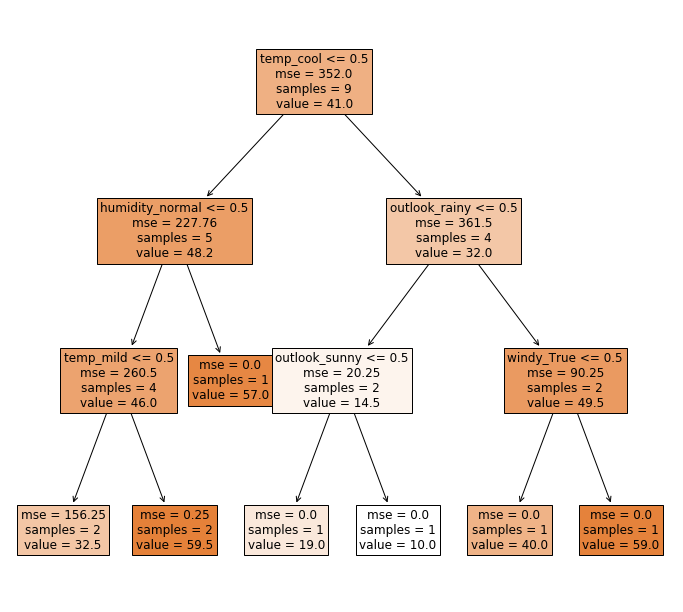

In [29]:
fig = plt.figure(figsize=(12,11))
a = plot_tree(dtree, feature_names=X_train.columns, fontsize=12, filled=True, class_names=['Not Play', 'Play'])#Because in our data 1st class label is not play in resp. variable
plt.show()

&nbsp;

### Model Performance

In [55]:
y_pred = dtree.predict(X_test)
print('Mean Absolute Error/Mean of errors :', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nMean of y_test :',np.mean(y_test))
r_squared = metrics.r2_score(y_test, y_pred)
print('\nr_squared :',r_squared)

Mean Absolute Error/Mean of errors : 41.3

Mean Squared Error: 1863.55

Root Mean Squared Error: 43.16885451341047

Mean of y_test : 36.8

r_squared : -1.1211414132216353


&nbsp;

### Visualising the Regression results

Test Actuals : [29, 95, 17, 15, 28]

Test Predicted : [57.0, 32.5, 59.5, 59.5, 57.0]



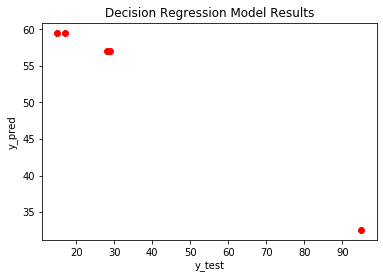

In [53]:
print('Test Actuals : {}\n'.format(y_test.tolist()))
print('Test Predicted : {}\n'.format(y_pred.tolist()))
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Decision Regression Model Results')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

&nbsp;

### Take Away Points :
> * R-squared explains the degree to which our input variables explain the variation of our output/predicted variable.
> * Value of R² lies between 0 and 1 where 0 means no-fit and 1 means perfectly-fit.
> * We are getting -1.1 which is not at all a good model.
> * In above graph we can see y_pred's are not near to y_actuals. which is bad model. 
> * If MAE/Mean of errors is << y_test mean the model is better.
> * In our case model doesn't performed well. Because MAE > y_test mean.
> * Root Mean Square Error (RMSE) is the standard deviation of the residuals, how much each residual value dispersion/differ from its residual mean. Lesser is good. Becuase we expect all residuals are to be 0 or minimum, then its residual mean to be minimum and  dispersion/differ from means to be minimum.(i.e., how much each residual differ value, lower residual is good indication for good model).